/tmp/ipykernel_919515/1372816341.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




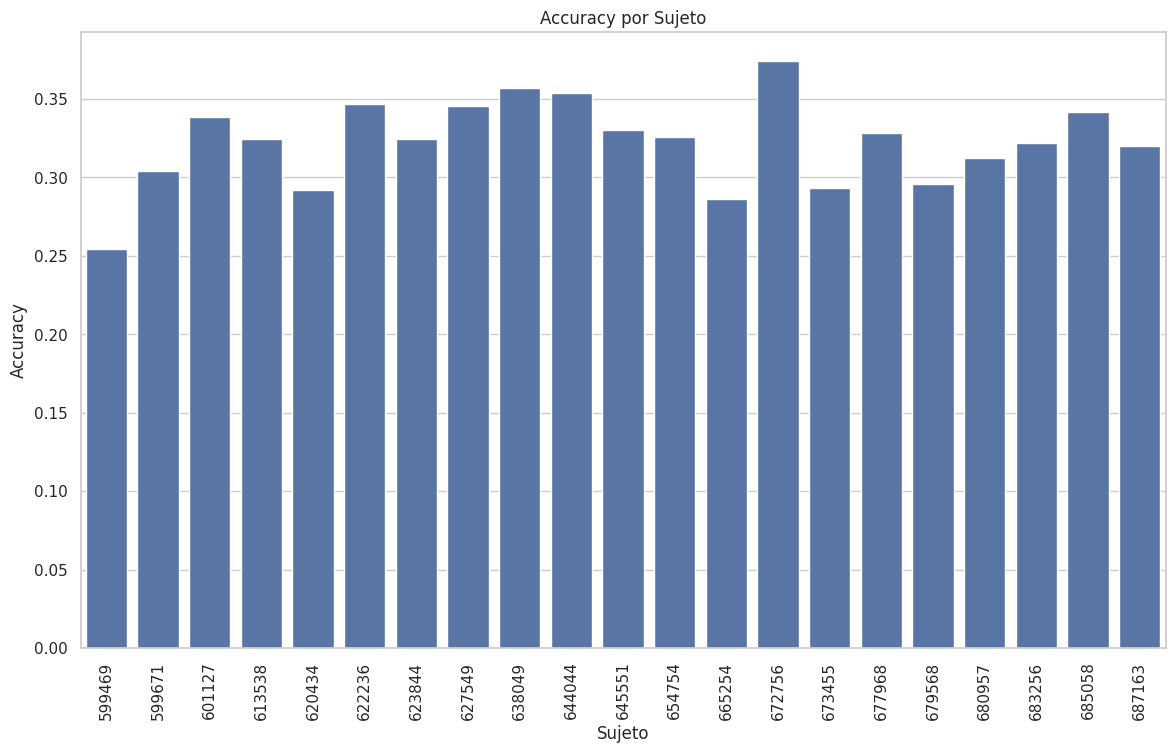

/tmp/ipykernel_919515/1372816341.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




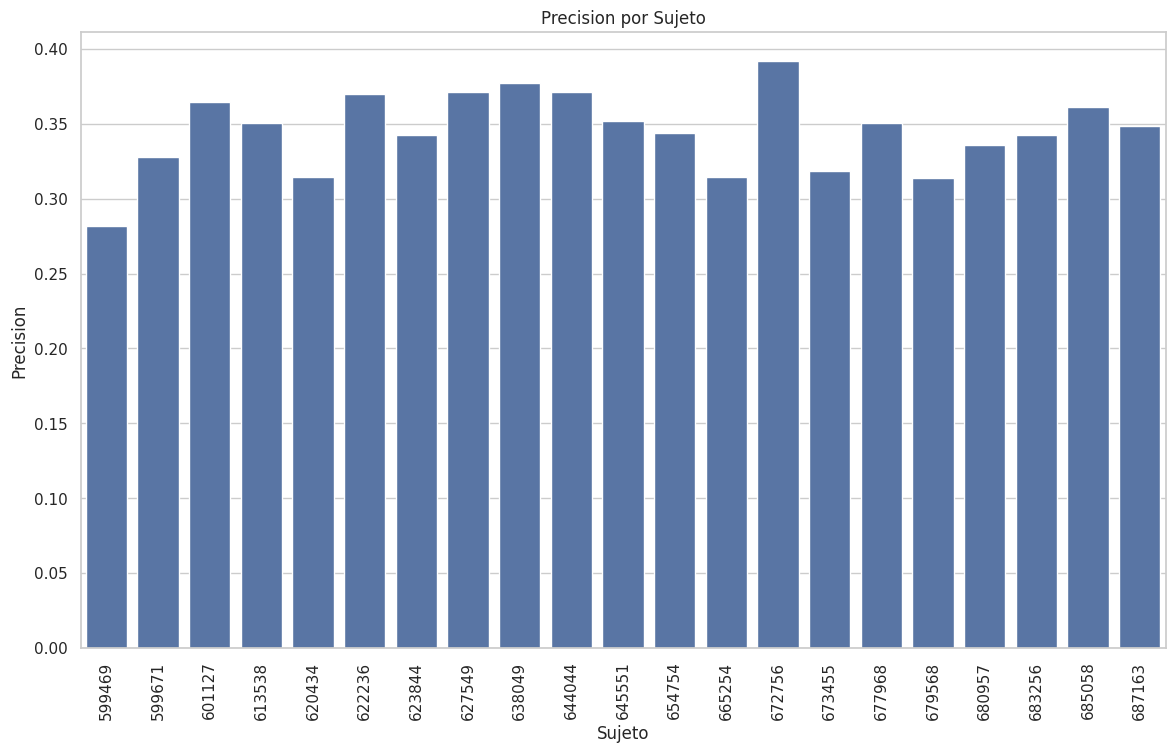

/tmp/ipykernel_919515/1372816341.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




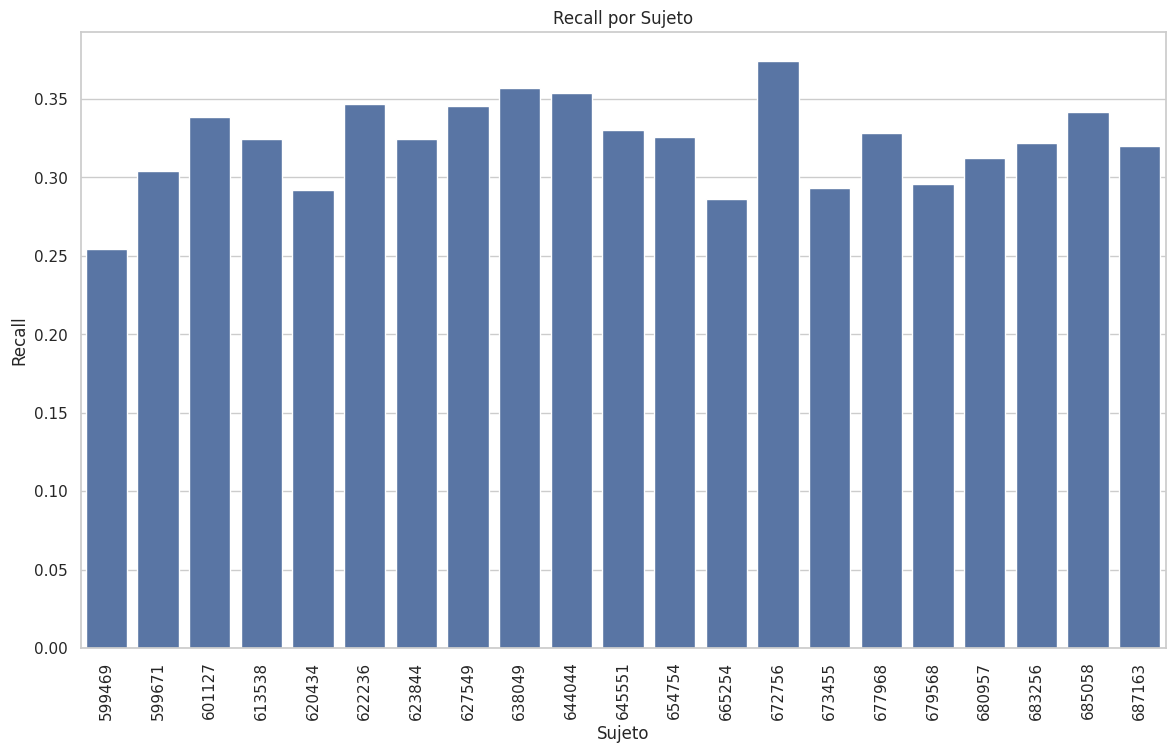

/tmp/ipykernel_919515/1372816341.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




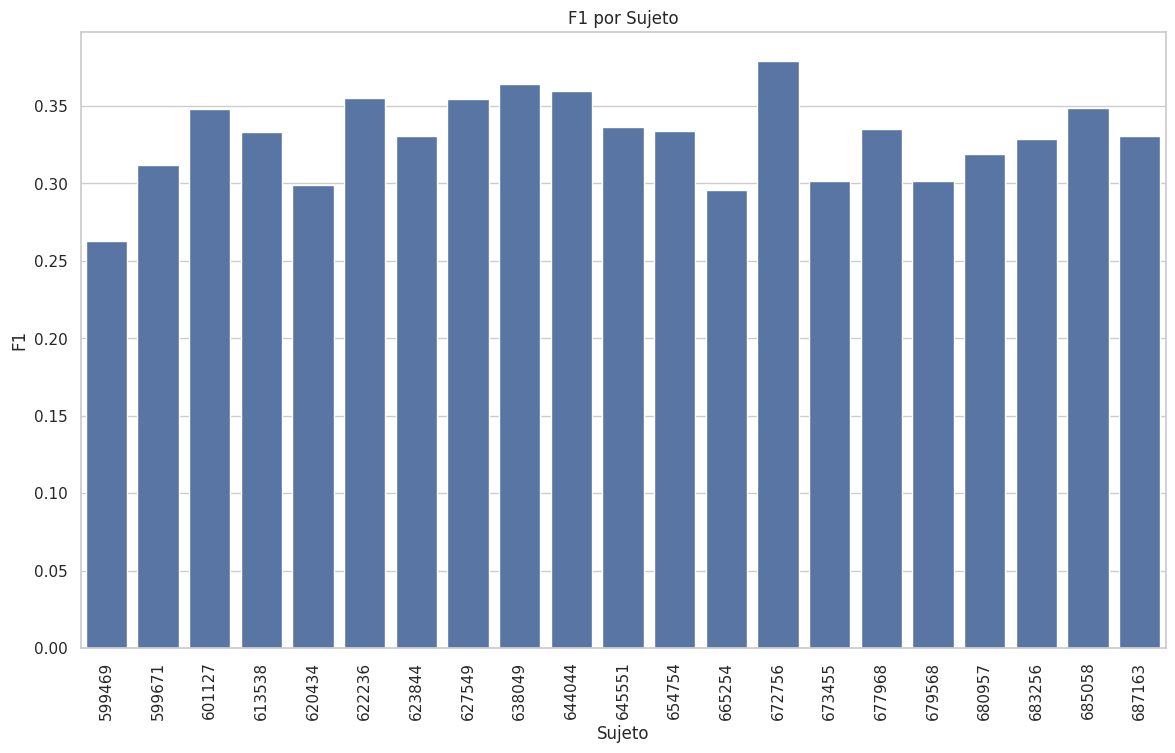

/tmp/ipykernel_919515/1372816341.py:20: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




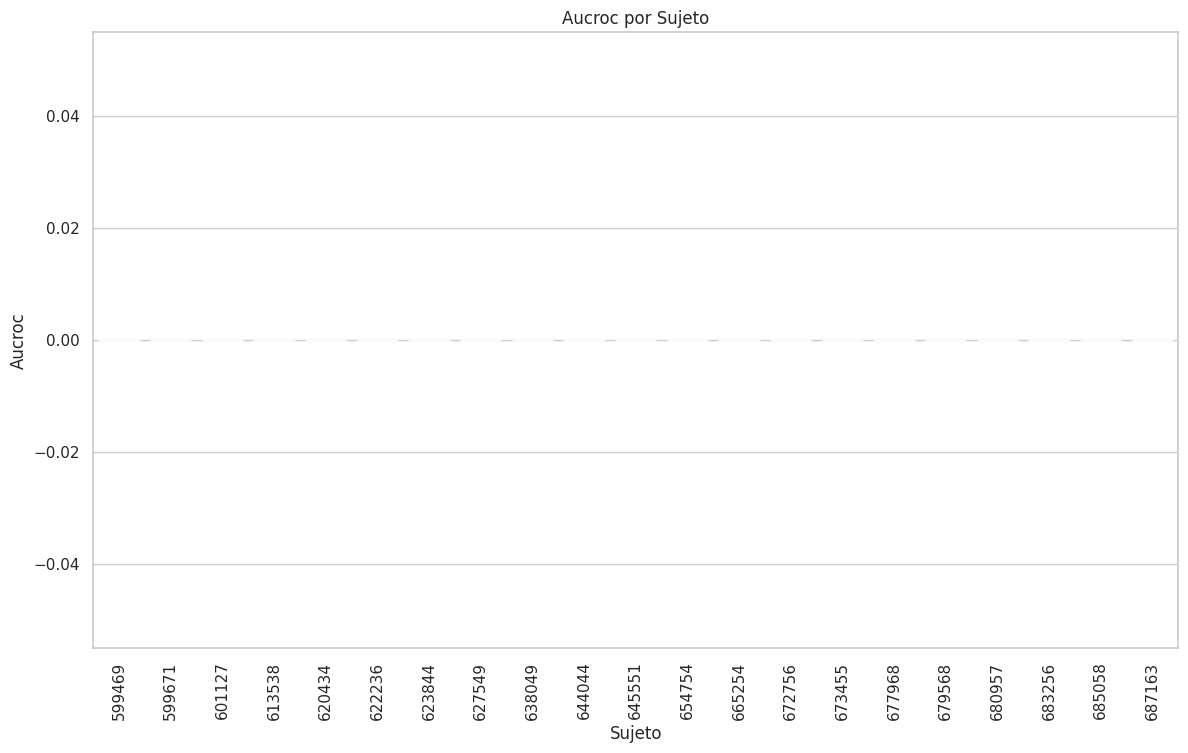

/tmp/ipykernel_919515/1372816341.py:30: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




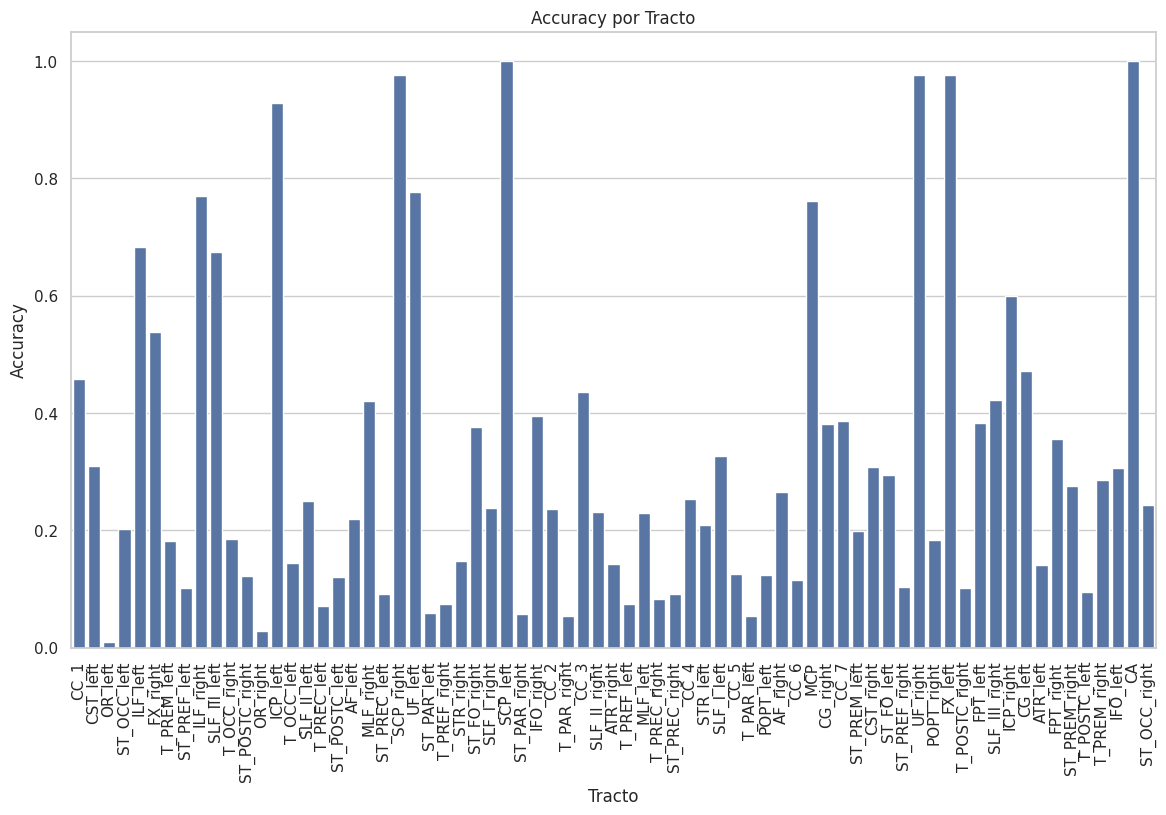

/tmp/ipykernel_919515/1372816341.py:30: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




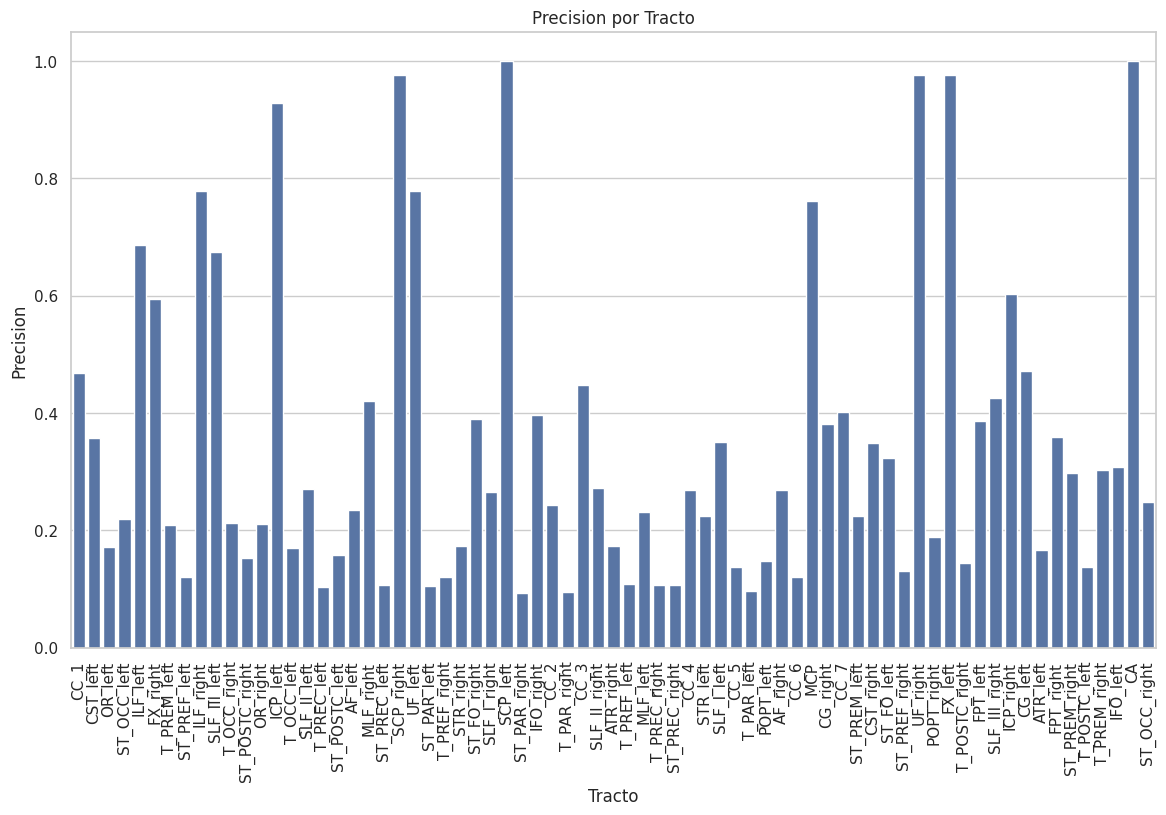

/tmp/ipykernel_919515/1372816341.py:30: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




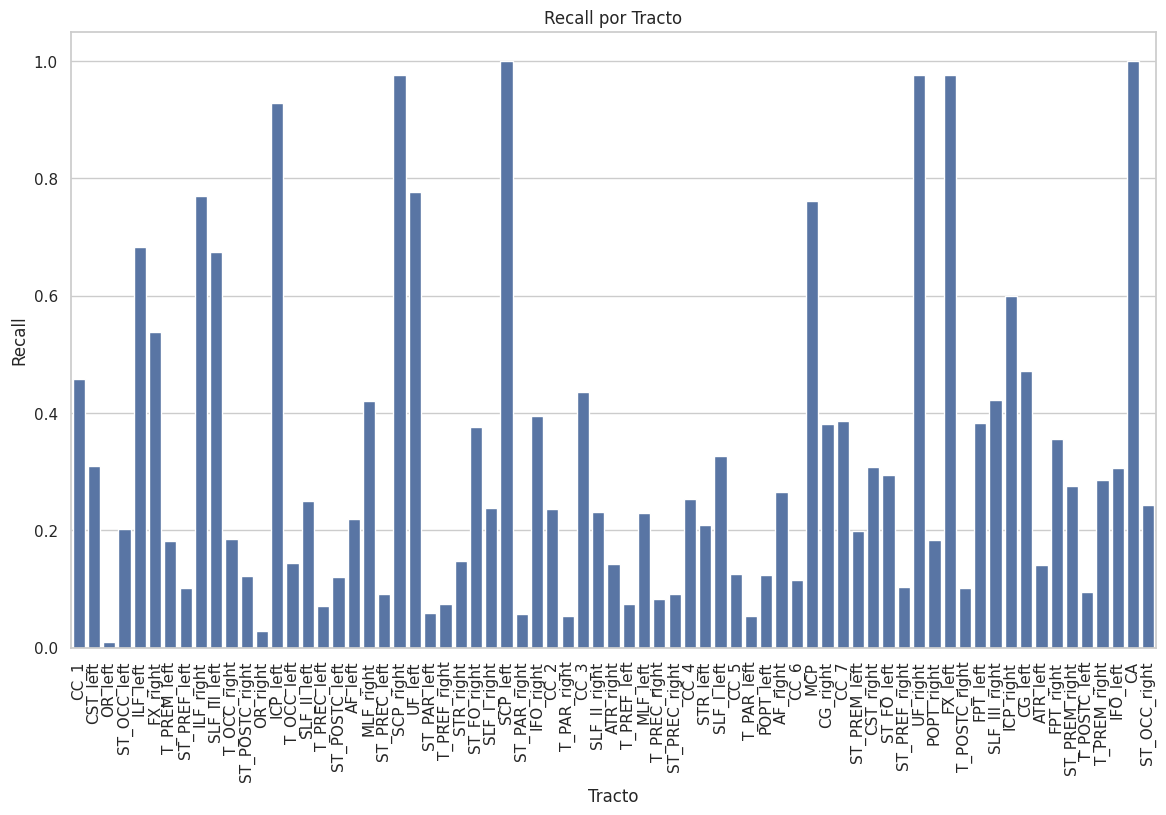

/tmp/ipykernel_919515/1372816341.py:30: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




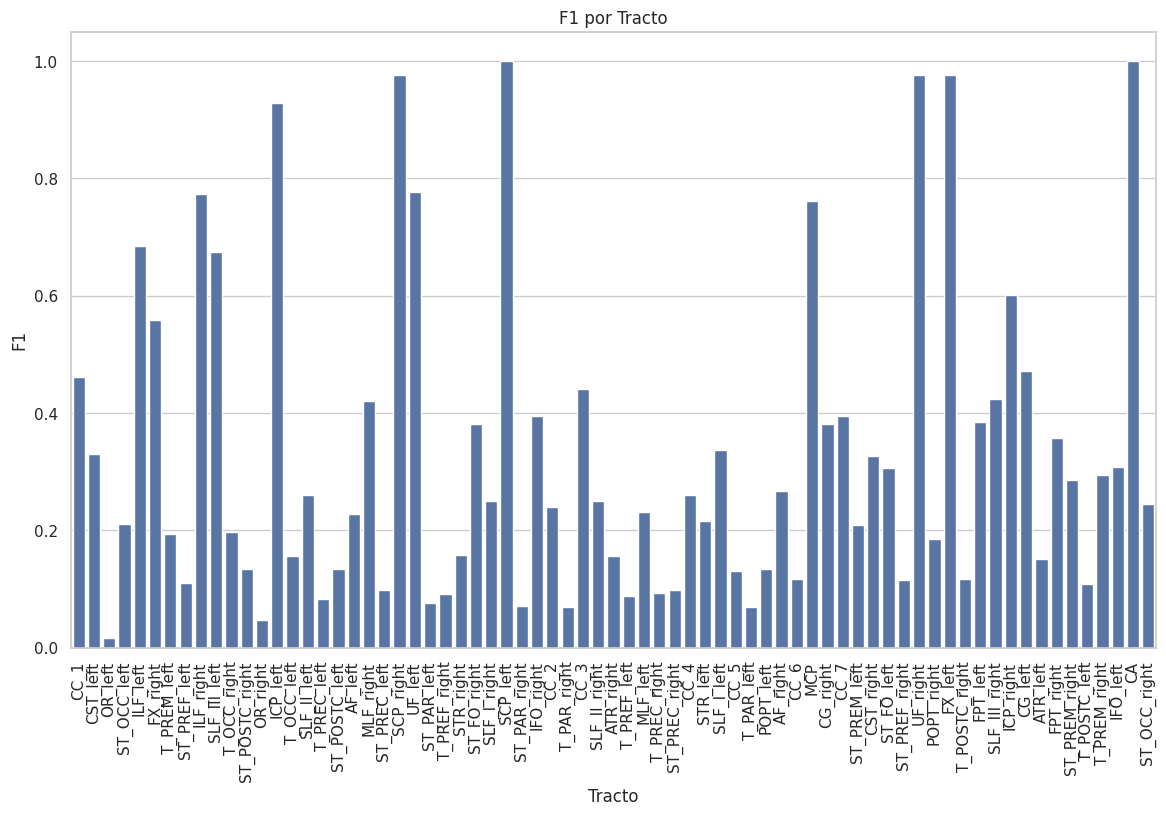

/tmp/ipykernel_919515/1372816341.py:30: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




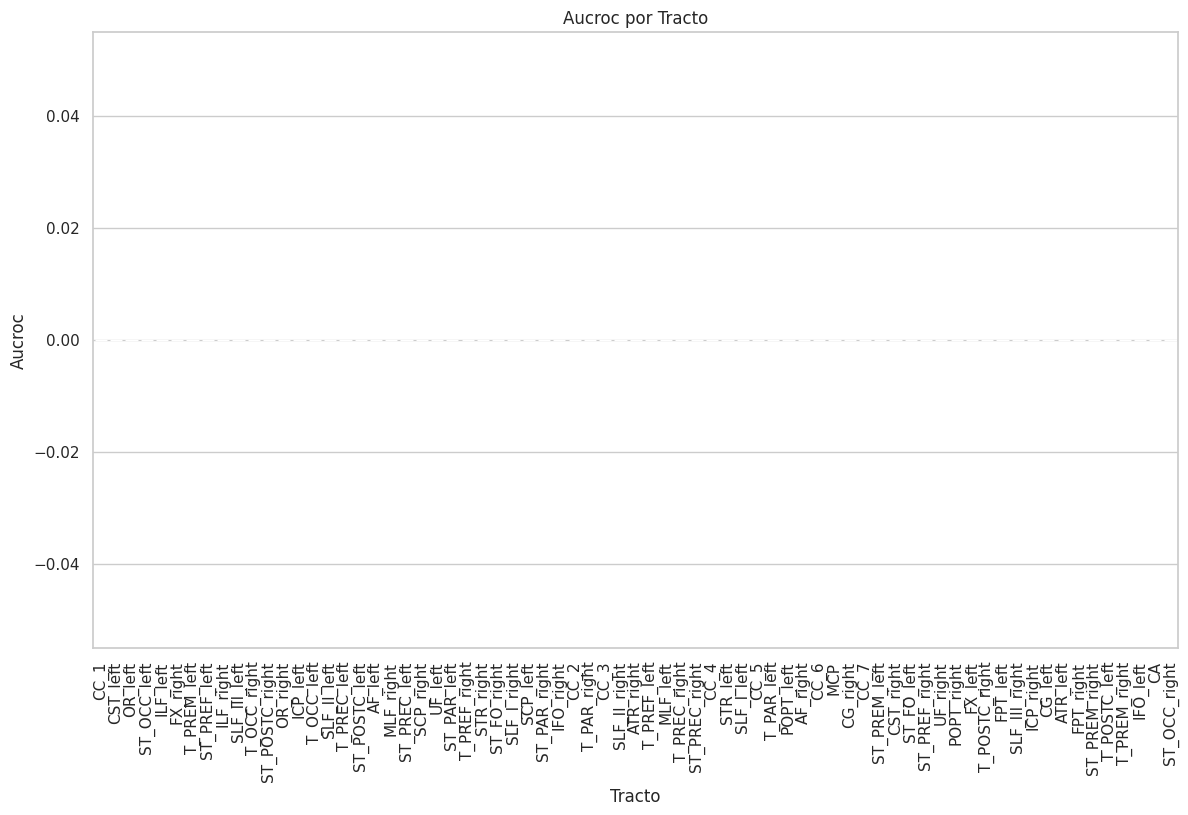

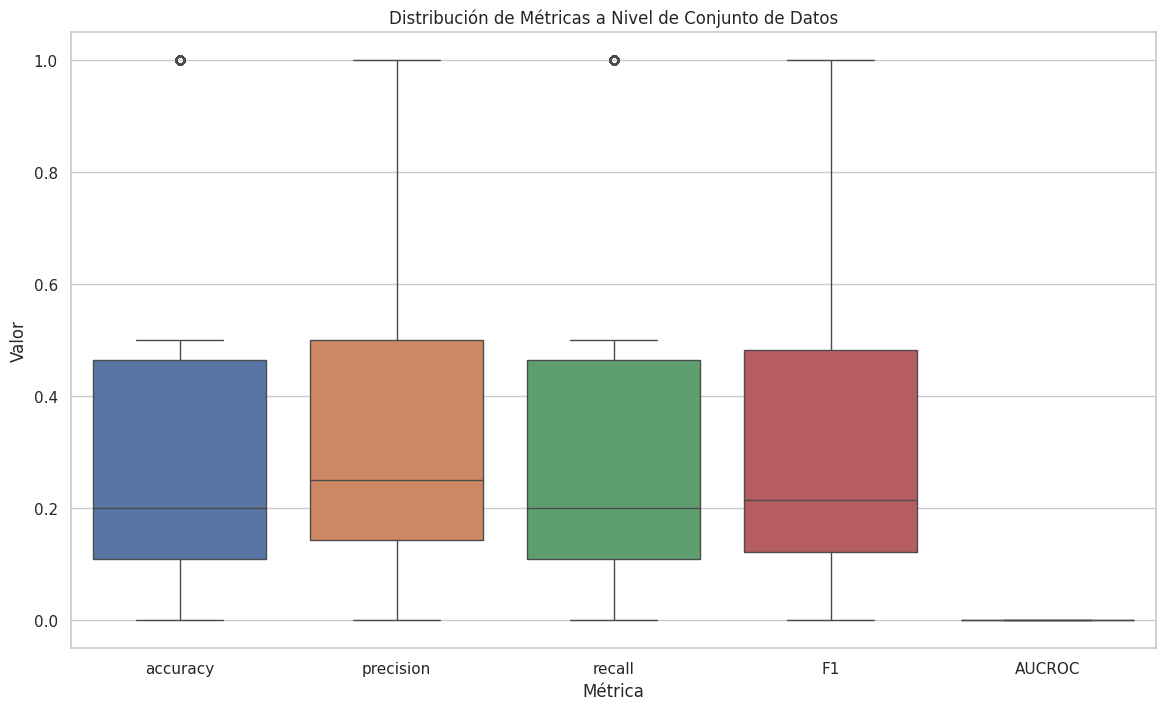

            count      mean       std  min       25%       50%       75%  max
accuracy   1490.0  0.322421  0.304080  0.0  0.109958  0.199629  0.464813  1.0
precision  1490.0  0.344893  0.292162  0.0  0.142857  0.250000  0.500000  1.0
recall     1490.0  0.322421  0.304080  0.0  0.109958  0.199629  0.464813  1.0
F1         1490.0  0.330017  0.300410  0.0  0.121437  0.214822  0.481765  1.0
AUCROC     1490.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0


/tmp/ipykernel_919515/1372816341.py:76: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




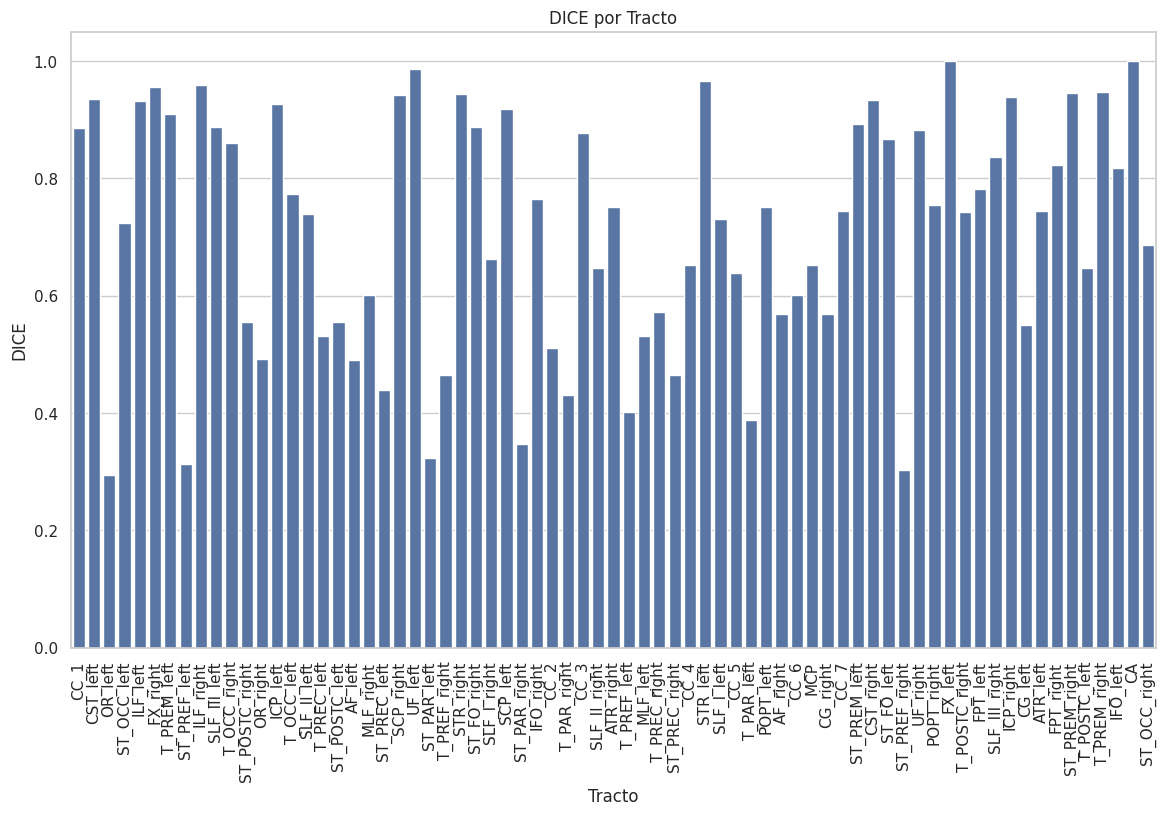

/tmp/ipykernel_919515/1372816341.py:84: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




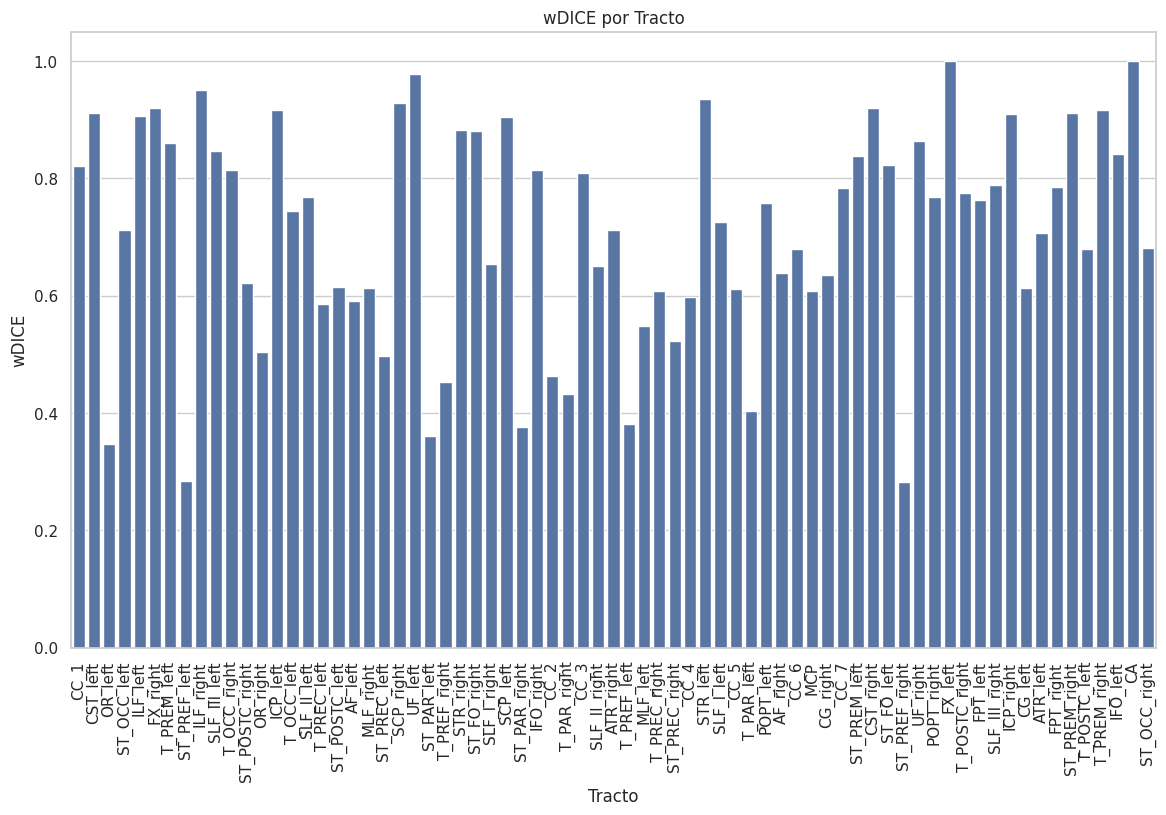

Estadísticas a nivel de sujeto:
            accuracy  precision    recall        F1  AUCROC
subject_id                                                 
599469      0.254388   0.281391  0.254388  0.262512     0.0
599671      0.304039   0.327816  0.304039  0.312060     0.0
601127      0.338655   0.364163  0.338655  0.348323     0.0
613538      0.324129   0.350622  0.324129  0.332953     0.0
620434      0.291839   0.314191  0.291839  0.298795     0.0
622236      0.346557   0.369780  0.346557  0.355132     0.0
623844      0.324671   0.342518  0.324671  0.330516     0.0
627549      0.345723   0.371144  0.345723  0.354625     0.0
638049      0.356809   0.377064  0.356809  0.364039     0.0
644044      0.353749   0.370949  0.353749  0.359562     0.0
645551      0.330282   0.351783  0.330282  0.336652     0.0
654754      0.325692   0.344065  0.325692  0.333635     0.0
665254      0.286355   0.314166  0.286355  0.295972     0.0
672756      0.373923   0.391639  0.373923  0.378817     0.0
673455  

In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar el archivo CSV
file_path = '/app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2.csv'  # Ajusta la ruta según sea necesario
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataframe
df.head()

# Configuración de estilos
sns.set(style="whitegrid")

# Función para crear gráficos de barras por métrica a nivel de sujeto
def plot_subject_level_metrics(df, metric):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='subject_id', y=metric, data=df, ci=None)
    plt.xticks(rotation=90)
    plt.title(f'{metric.capitalize()} por Sujeto')
    plt.xlabel('Sujeto')
    plt.ylabel(metric.capitalize())
    plt.show()

# Función para crear gráficos de barras por métrica a nivel de tracto
def plot_tract_level_metrics(df, metric):
    plt.figure(figsize=(14, 8))
    sns.barplot(x='tract', y=metric, data=df, ci=None)
    plt.xticks(rotation=90)
    plt.title(f'{metric.capitalize()} por Tracto')
    plt.xlabel('Tracto')
    plt.ylabel(metric.capitalize())
    plt.show()

# Función para crear gráficos de caja por métrica a nivel de conjunto de datos
def plot_dataset_level_metrics(df, metrics):
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df[metrics])
    plt.title('Distribución de Métricas a Nivel de Conjunto de Datos')
    plt.xlabel('Métrica')
    plt.ylabel('Valor')
    plt.show()

# Función para calcular y mostrar estadísticas a nivel de conjunto de datos
def dataset_statistics(df, metrics):
    stats = df[metrics].describe().transpose()
    print(stats)
    return stats

# Crear gráficos a nivel de sujeto
metrics = ['accuracy', 'precision', 'recall', 'F1', 'AUCROC']
for metric in metrics:
    plot_subject_level_metrics(df, metric)

# Crear gráficos a nivel de tracto
for metric in metrics:
    plot_tract_level_metrics(df, metric)

# Crear gráfico de caja a nivel de conjunto de datos
plot_dataset_level_metrics(df, metrics)

# Calcular y mostrar estadísticas a nivel de conjunto de datos
dataset_stats = dataset_statistics(df, metrics)

# Crear un gráfico de dispersión interactivo para DICE y wDICE a nivel de tracto
fig = px.scatter(df, x='DICE', y='wDICE', color='tract', 
                 title='DICE vs wDICE por Tracto',
                 labels={'DICE': 'DICE', 'wDICE': 'wDICE'})

fig.show()

# Crear gráfico de barras a nivel de conjunto de datos para DICE y wDICE
plt.figure(figsize=(14, 8))
sns.barplot(x='tract', y='DICE', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('DICE por Tracto')
plt.xlabel('Tracto')
plt.ylabel('DICE')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='tract', y='wDICE', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('wDICE por Tracto')
plt.xlabel('Tracto')
plt.ylabel('wDICE')
plt.show()

# Calcular estadísticas a nivel de sujeto y tracto
subject_stats = df.groupby('subject_id')[metrics].mean()
tract_stats = df.groupby('tract')[metrics].mean()

# Mostrar estadísticas a nivel de sujeto y tracto
print("Estadísticas a nivel de sujeto:")
print(subject_stats)

print("Estadísticas a nivel de tracto:")
print(tract_stats)


In [2]:
# Calcular y mostrar todos los valores promedio de wDICE a nivel de tracto
tract_DICE_avg = df.groupby('tract')['DICE'].mean()
print(tract_DICE_avg)


tract
AF_left         0.490772
AF_right        0.568045
ATR_left        0.744954
ATR_right       0.751238
CA              1.000000
                  ...   
T_PREF_right    0.464603
T_PREM_left     0.909008
T_PREM_right    0.947954
UF_left         0.986538
UF_right        0.882790
Name: DICE, Length: 71, dtype: float64


In [3]:
# Calcular y mostrar los valores promedio de wDICE a nivel de tracto
tract_wDICE_avg = df.groupby('tract')['wDICE'].mean()
tract_wDICE_avg

tract
AF_left         0.590847
AF_right        0.639470
ATR_left        0.706423
ATR_right       0.712328
CA              1.000000
                  ...   
T_PREF_right    0.453806
T_PREM_left     0.860769
T_PREM_right    0.916211
UF_left         0.977482
UF_right        0.863712
Name: wDICE, Length: 71, dtype: float64

In [5]:
# Cargar archivo csv /app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2.csv
file_path = '/app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2.csv'  # Ajusta la ruta según sea necesario
df = pd.read_csv(file_path)

df


,subject_id,tract,accuracy,precision,recall,F1,AUCROC,DICE,wDICE
0,687163,CC_1,0.272592,0.333333,0.272592,0.299918,0.0,0.866436,0.806792
1,687163,CST_left,0.315485,0.333333,0.315485,0.324164,0.0,0.980144,0.962887
2,687163,OR_left,0.063433,0.166667,0.063433,0.091892,0.0,0.762591,0.688440
3,687163,ST_OCC_left,0.162682,0.166667,0.162682,0.164650,0.0,0.695537,0.581683
4,687163,ILF_left,0.226210,0.250000,0.226210,0.237511,0.0,0.867494,0.833598
...,...,...,...,...,...,...,...,...,...
1485,638049,T_POSTC_left,0.120919,0.125000,0.120919,0.122926,0.0,0.786072,0.736148
1486,638049,T_PREM_right,0.331254,0.333333,0.331254,0.332291,0.0,0.875723,0.853916
1487,638049,IFO_left,0.333161,0.333333,0.333161,0.333247,0.0,0.920851,0.889751
1488,638049,CA,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


## Weighted DICE metrics per tract

/tmp/ipykernel_919515/3453599749.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




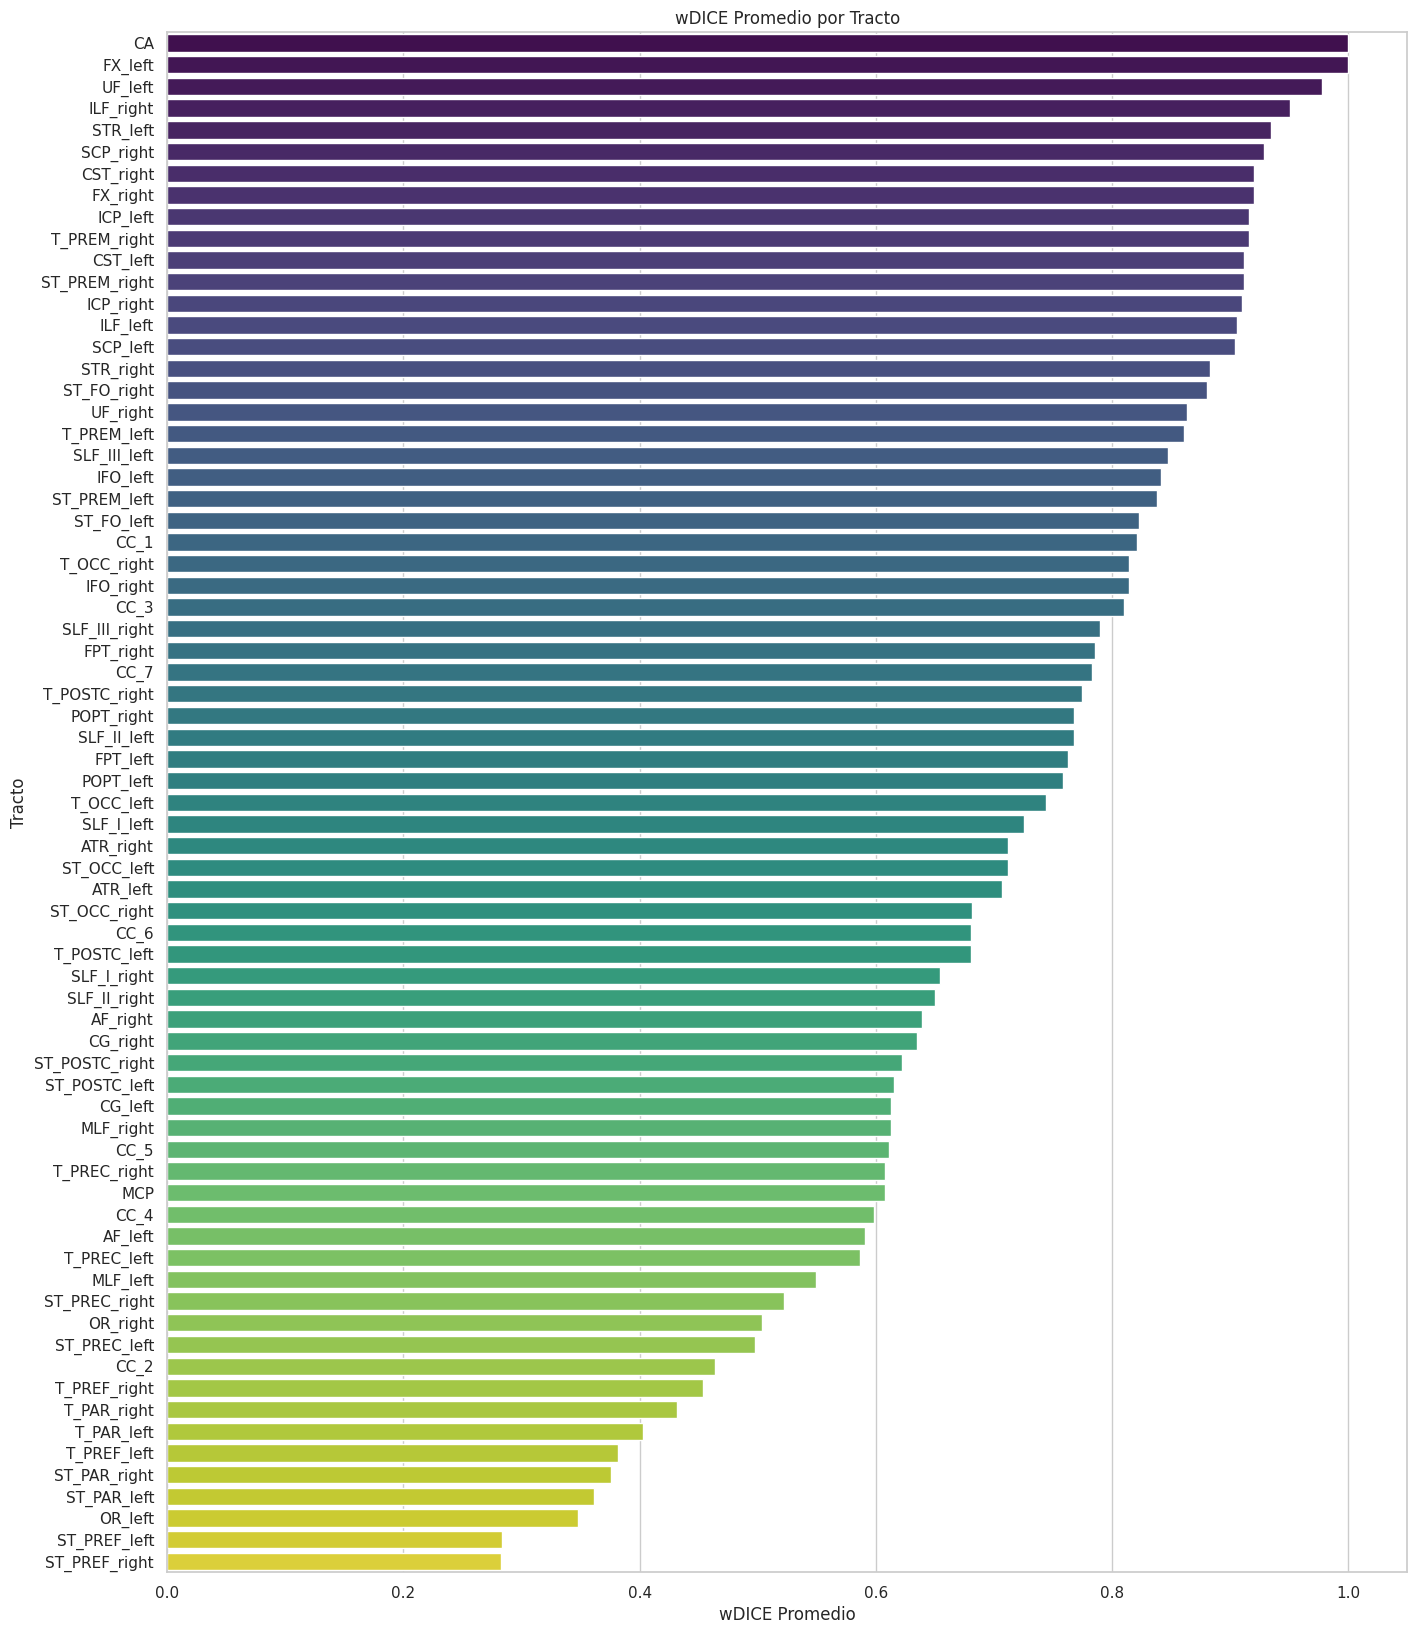

In [11]:
# Calcular la media de wDICE para cada tracto
tract_wDICE_avg = df.groupby('tract')['wDICE'].mean()
# Ordenar los valores promedio de wDICE de mayor a menor
tract_wDICE_avg = tract_wDICE_avg.sort_values(ascending=False)

# Crear un gráfico de barras horizontales para mostrar los valores promedio de wDICE por tracto
plt.figure(figsize=(16, 20))
sns.barplot(x=tract_wDICE_avg.values, y=tract_wDICE_avg.index, palette='viridis')
plt.xlabel('wDICE Promedio')
plt.ylabel('Tracto')
plt.title('wDICE Promedio por Tracto')
plt.show()

## DICE metrics per tract

/tmp/ipykernel_919515/667507015.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




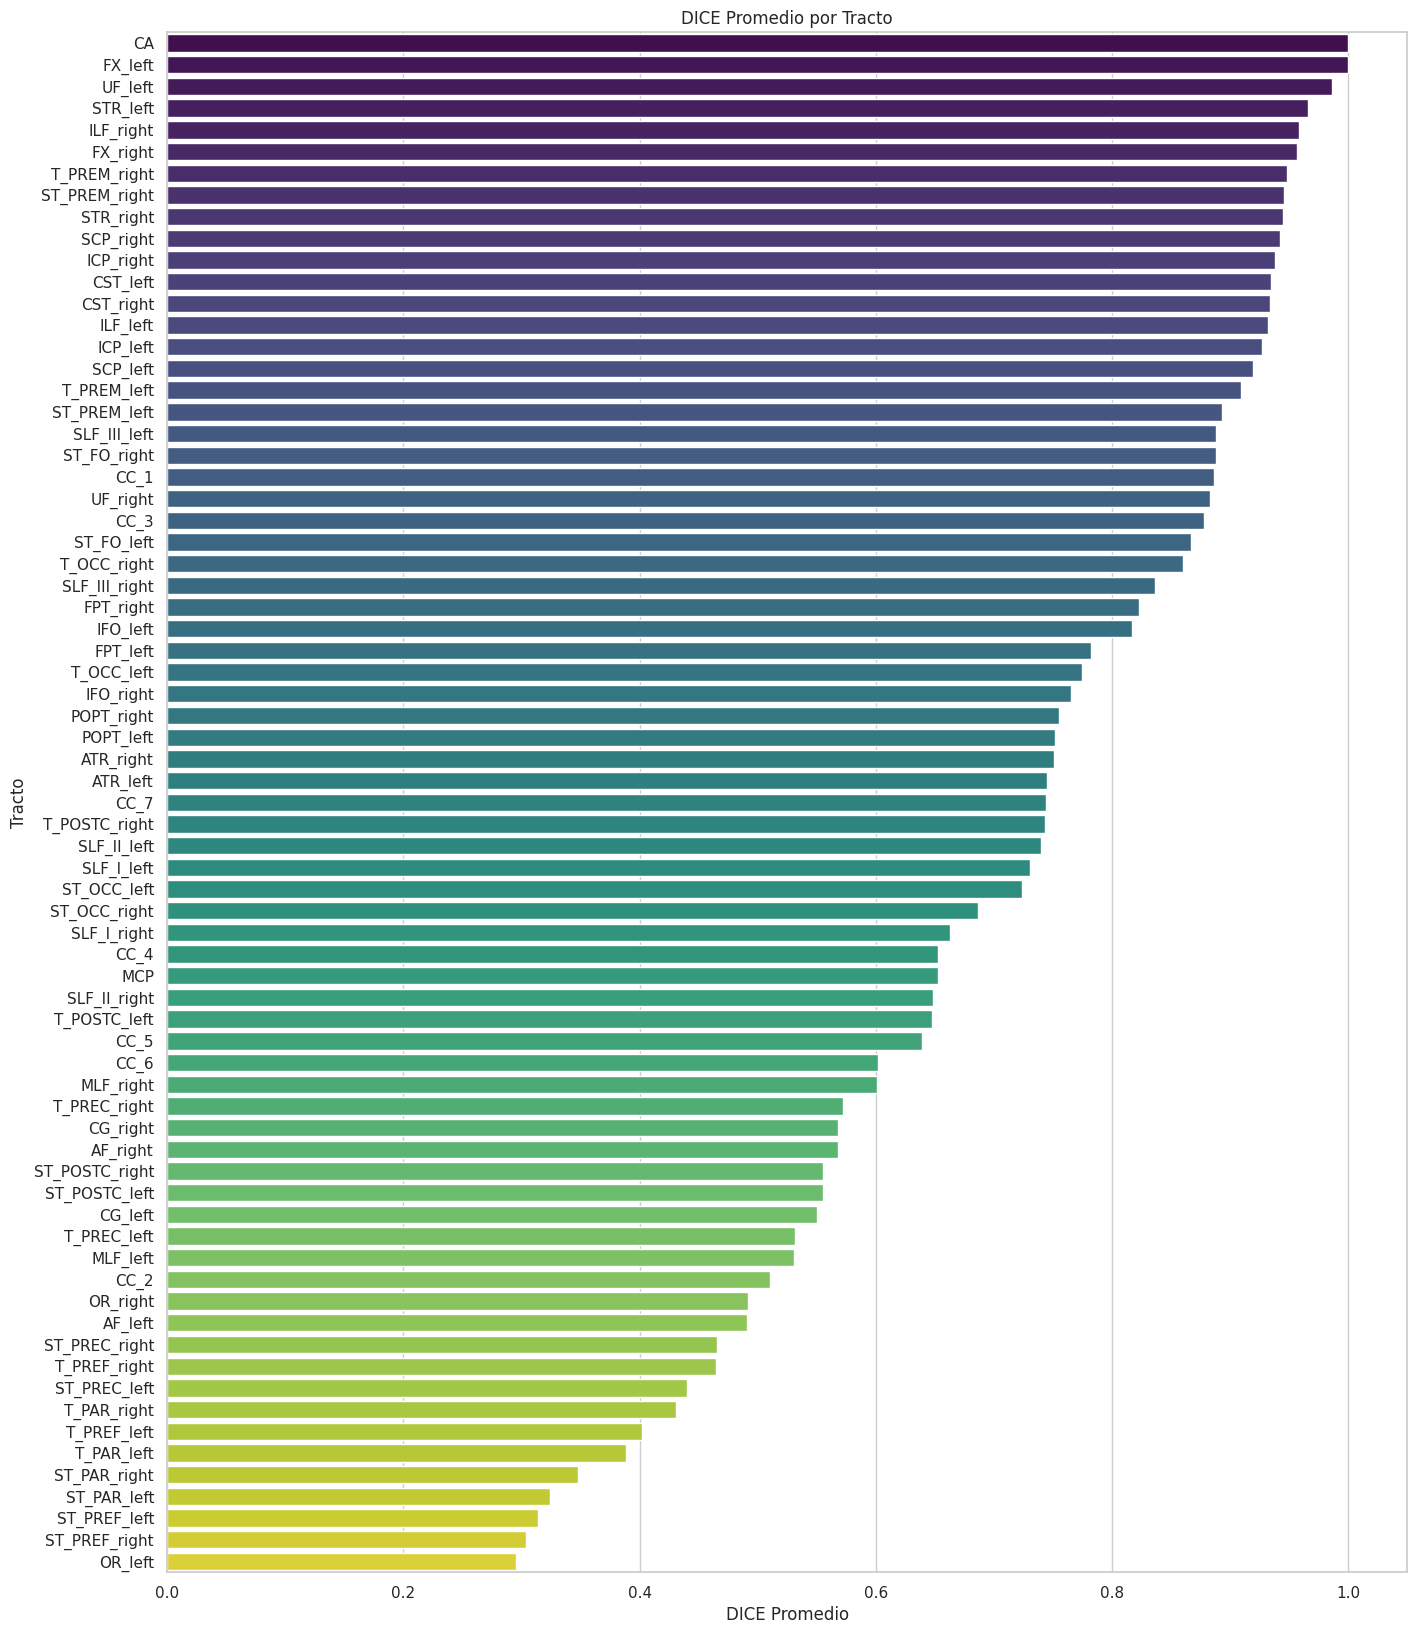

In [12]:
# Calcular la media de wDICE para cada tracto
tract_DICE_avg = df.groupby('tract')['DICE'].mean()
# Ordenar los valores promedio de wDICE de mayor a menor
tract_DICE_avg = tract_DICE_avg.sort_values(ascending=False)

# Crear un gráfico de barras horizontales para mostrar los valores promedio de wDICE por tracto
plt.figure(figsize=(16, 20))
sns.barplot(x=tract_DICE_avg.values, y=tract_DICE_avg.index, palette='viridis')
plt.xlabel('DICE Promedio')
plt.ylabel('Tracto')
plt.title('DICE Promedio por Tracto')
plt.show()
